In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Zomato-data.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [4]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [5]:
df.nunique()

name                           145
online_order                     2
book_table                       2
rate                            20
votes                           90
approx_cost(for two people)     18
listed_in(type)                  4
dtype: int64

In [6]:
def handleRate(value):
    value = str(value).split("/")
    value=value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


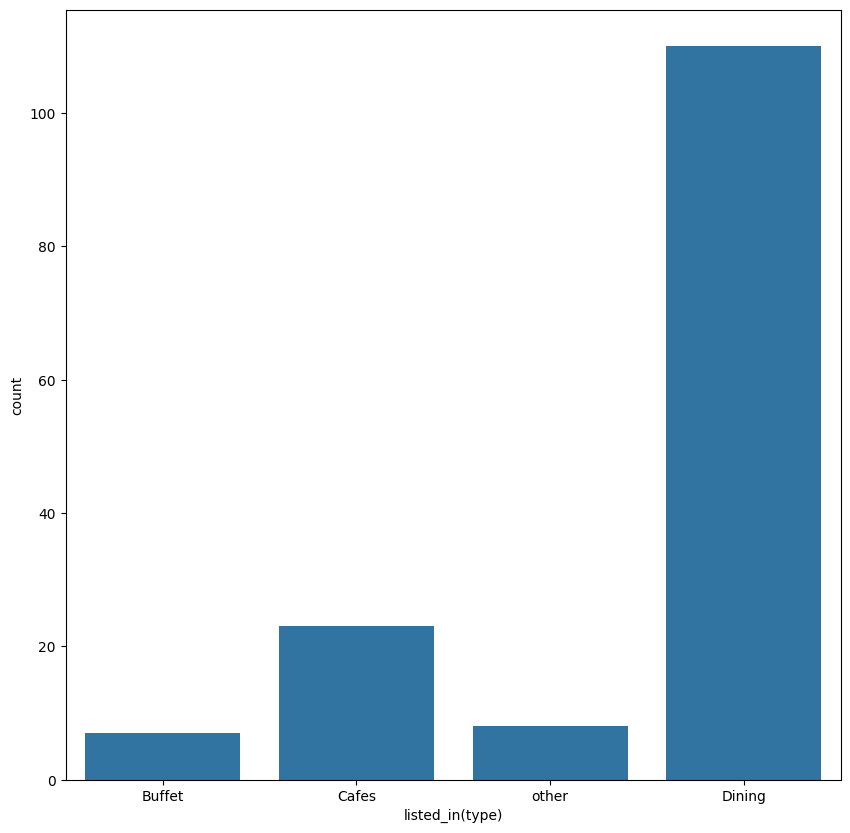

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='listed_in(type)')
plt.show()

Text(0, 0.5, 'Rate')

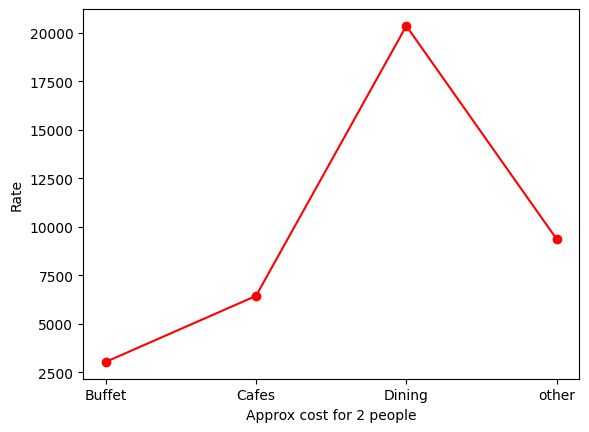

In [8]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='red', marker='o')
plt.xlabel('Approx cost for 2 people')
plt.ylabel('Rate')


C:\Users\cheta\AppData\Local\Temp\ipykernel_20624\3620316701.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='online_order', palette="Set2")


<Axes: xlabel='online_order', ylabel='count'>

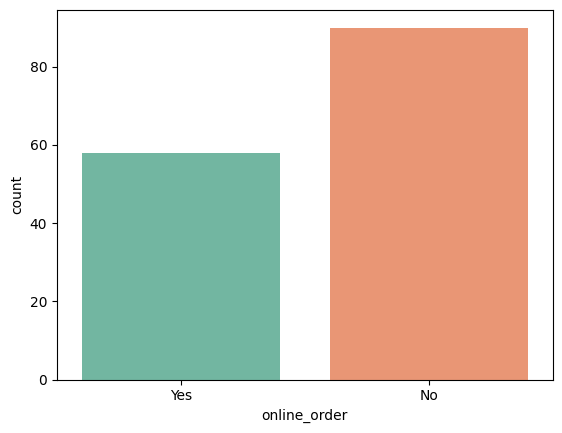

In [9]:
sns.countplot(data=df, x='online_order', palette="Set2")

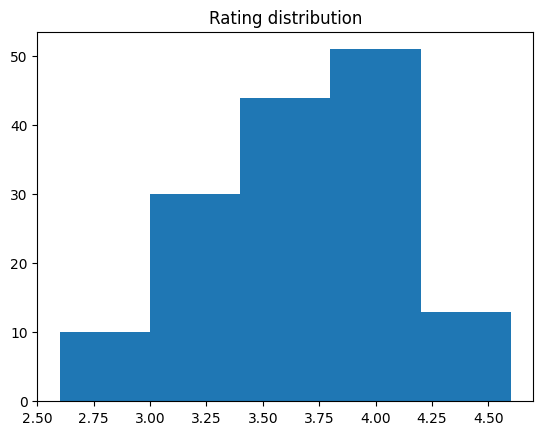

In [10]:
plt.hist(x=df['rate'], bins=5)
plt.title("Rating distribution")
plt.show()

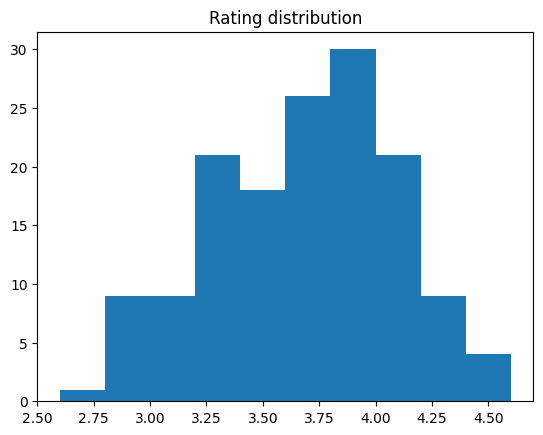

In [11]:
plt.hist(x=df['rate'])
plt.title("Rating distribution")
plt.show()

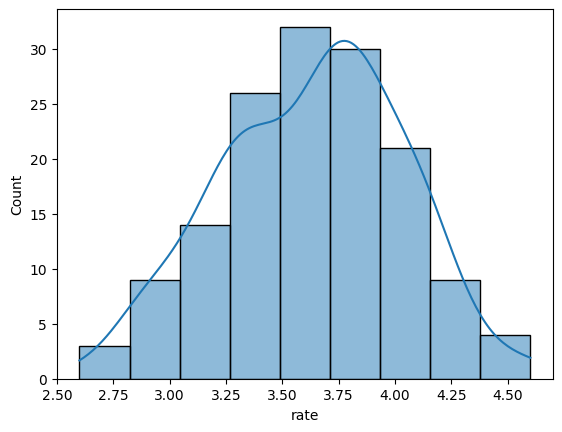

In [12]:
sns.histplot(data=df, x=df['rate'], kde=True)
plt.show()

C:\Users\cheta\AppData\Local\Temp\ipykernel_20624\3320273964.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['approx_cost(for two people)'], palette="Set2")


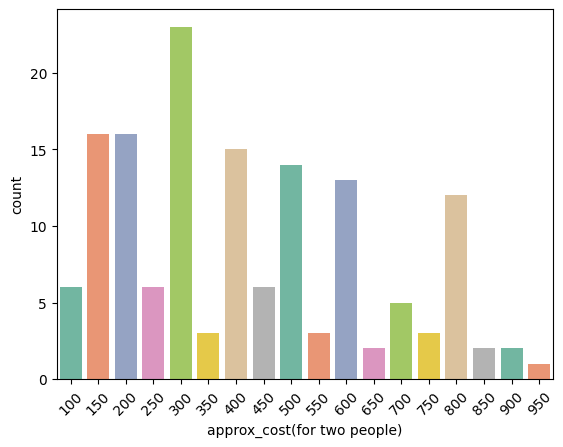

In [13]:
sns.countplot(data=df, x=df['approx_cost(for two people)'], palette="Set2")
plt.xticks(rotation=45)
plt.show()

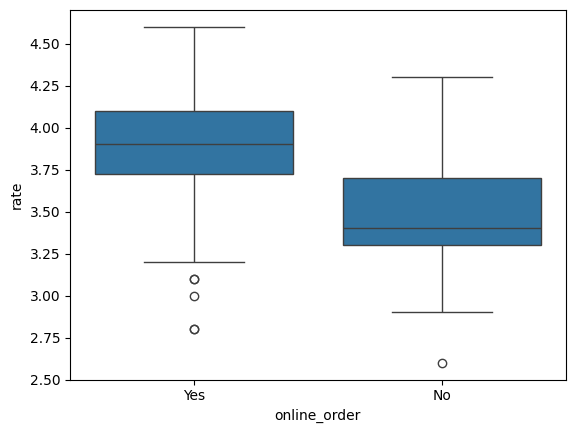

In [14]:
sns.boxplot(data=df, x='online_order', y='rate')
plt.show()

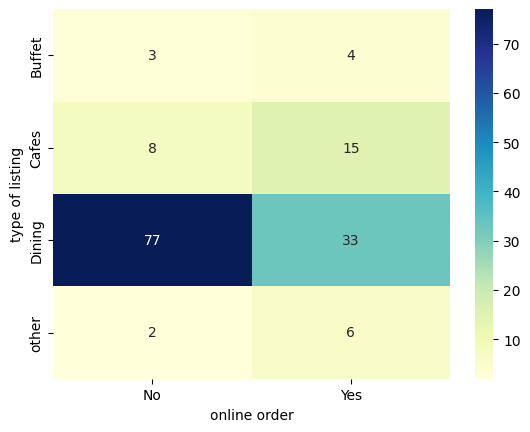

In [15]:
pvt_table = df.pivot_table(index='listed_in(type)',columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pvt_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel("online order")
plt.ylabel("type of listing")
plt.show()